In [1]:
import pandas as pd
import numpy as np
import seaborn as sns, matplotlib.pyplot as plt
import warnings

In [2]:
# plt.rcParams["figure.figsize"] = (18, 6)
warnings.filterwarnings("ignore")

In [3]:
orders = pd.read_excel("orders.xlsx")

In [4]:
products = pd.read_excel("products.xlsx")

Описание данных

Таблица products:
product_id - id товара
level1 - категория
level2 - подкатегория
name - наименование товара

Таблица orders:
order_id - номер чека
accepted_at - дата и время чека
product_id - id товара
quantity - кол-во товара в чеке
regular_price - регулярная цена
price - текущая цена
cost_price - закупочная цена

In [5]:
orders.isna().any()

order_id         False
accepted_at      False
product_id       False
quantity         False
regular_price    False
price            False
cost_price       False
dtype: bool

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3323 non-null   int64         
 1   accepted_at    3323 non-null   datetime64[ns]
 2   product_id     3323 non-null   int64         
 3   quantity       3323 non-null   int64         
 4   regular_price  3323 non-null   int64         
 5   price          3323 non-null   int64         
 6   cost_price     3323 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 181.9 KB


In [7]:
orders.describe()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
count,3.323000e+03,3323,3323.000000,3323.00000,3323.000000,3323.000000,3323.000000
mean,1.517529e+09,2022-01-13 16:02:37.557628416,22961.379175,1.23533,139.828167,130.645501,81.106229
min,1.517207e+09,2022-01-13 08:00:30,23.000000,1.00000,11.000000,4.000000,7.000000
25%,1.517454e+09,2022-01-13 12:50:33,6008.000000,1.00000,77.000000,72.000000,42.000000
50%,1.517524e+09,2022-01-13 16:26:22,12114.000000,1.00000,117.000000,109.000000,67.000000
75%,1.517605e+09,2022-01-13 19:22:00,30321.500000,1.00000,179.000000,165.000000,101.000000
max,1.517855e+09,2022-01-13 22:58:29,120497.000000,12.00000,1797.000000,1797.000000,808.000000
std,1.029182e+05,NaN,25476.196162,0.78861,104.195194,96.328751,61.505484


In [8]:
products.isna().any()

product_id    False
level1        False
level2        False
name           True
dtype: bool

In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  40152 non-null  int64 
 1   level1      40152 non-null  object
 2   level2      40152 non-null  object
 3   name        39940 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [10]:
products[products['name'].isna()]

,product_id,level1,level2,name
821,822,Безалкогольные напитки,Воды питьевые,NaN
1372,1373,Сыры,Мягкие сыры,NaN
2439,2442,Бытовая химия,Средства для уборки,NaN
3277,3281,Гигиена,Средства личной гигиены,NaN
3440,3444,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,NaN
...,...,...,...,...
39801,104104,"Кофе, какао",Кофе,NaN
39866,104714,Безалкогольные напитки,Напитки,NaN
40057,107597,Рынок,Рынок.Сыры,NaN
40065,107897,Молочная продукция,Кисломолочные традиционные продукты,NaN


1

Самая ходовая товарная группа
По какой категории товаров продано больше всего позиций?

Answer: [Молочная продукция	138]

Подкрепите свой ответ таблицей, в которой рассчитано количество проданных штук товара в каждой товарной категории.
Дополнительно постройте на основании этой таблицы barchart.
Проверьте, чтобы все подписи на вашем графике выглядели читаемо и понятно. Этот график должен быть сходу понятен стороннему наблюдателю.

My note: за кол-во позиций здесь буду принимать не общее количество штук, а кол-во уникальных продуктов

In [11]:
res1 = (
    orders["product_id"]
    .reset_index()
    .merge(products[["product_id", "level1"]])
    .groupby("level1")["product_id"]
    .agg({"nunique"})
    .sort_values("nunique", ascending=False)
    .reset_index()
)
res1.head(3)

,level1,nunique
0,Молочная продукция,138
1,Безалкогольные напитки,135
2,Бакалея,125


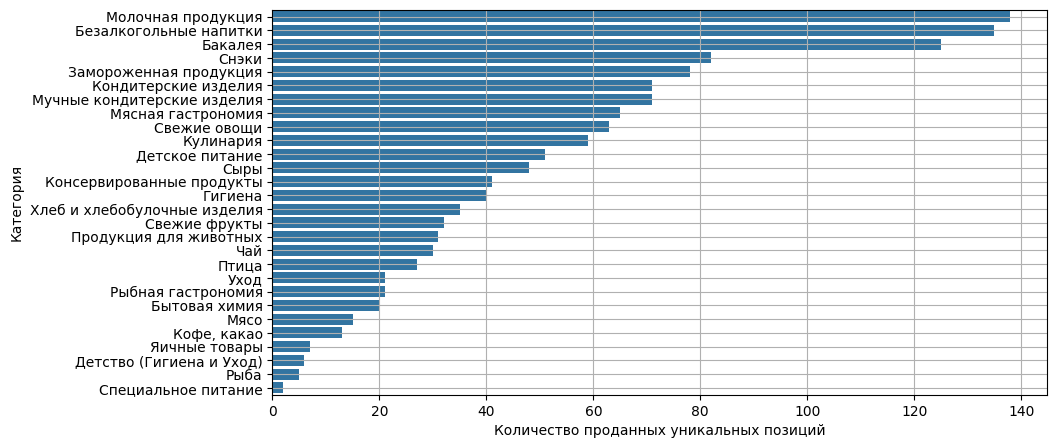

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(data=res1, x="nunique", y="level1")
plt.xlabel("Количество проданных уникальных позиций")
plt.ylabel("Категория")
plt.grid()

My note: теперь за кол-во позиций здесь приму общее количество проданных штук

In [27]:
res2 = (
    orders[["product_id", "quantity"]]
    .groupby("product_id")["quantity"]
    .sum()
    .reset_index()
    .merge(products[["product_id", "level1"]])
    .groupby("level1")["quantity"]
    .sum()
    .reset_index()
    .sort_values("quantity", ascending=False)
)
res2.head(3)

,level1,quantity
1,Безалкогольные напитки,534
11,Молочная продукция,483
19,Свежие овощи,262


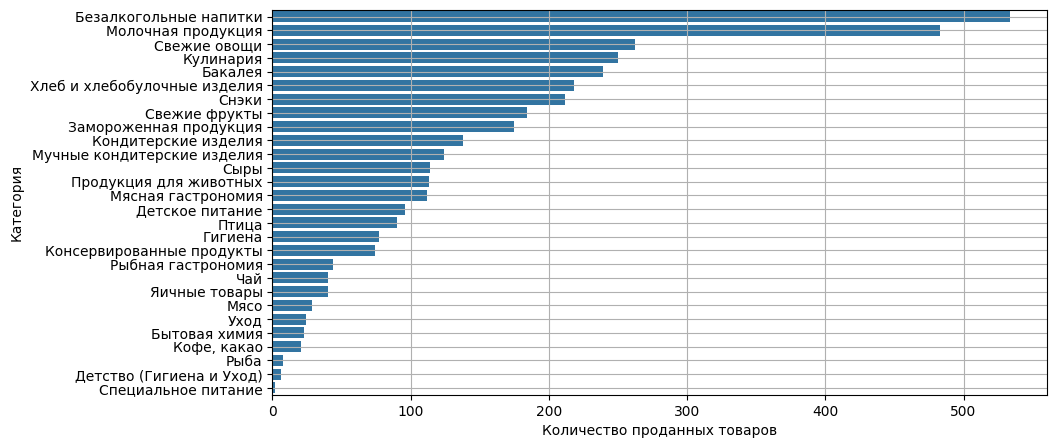

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(data=res2, x="quantity", y="level1")
plt.xlabel("Количество проданных товаров")
plt.ylabel("Категория")
plt.grid()

2

Распределение продаж по подкатегориям
Оцените распределение количества проданных позиций в каждой товарной категории (level1) по подкатегориям (level2). Проиллюстрируйте свой результат расчетной таблицей.

In [400]:
res2 = (
    orders[["order_id", "product_id"]]
    .merge(products[["product_id", "level1", "level2"]])
    .groupby(["level1", "level2"])["product_id"]
    .agg({"nunique"})
    .reset_index()
    .sort_values(["level1", "nunique"], ascending=[True, False])
)
res2[res2["level1"] == "Молочная продукция"]
res2.head(21)

,level1,level2,nunique
3,Бакалея,"Крупы, бобовые",20
4,Бакалея,Макаронные изделия,20
9,Бакалея,Соусы,20
1,Бакалея,Зерновые для завтраков,15
6,Бакалея,Пряности,14
2,Бакалея,Ингредиенты для готовки,7
7,Бакалея,Растительные масла,7
0,Бакалея,Все для суши,6
5,Бакалея,Мука и мучные смеси,6
10,Бакалея,Сухие блюда быстрого приготовления,6


пол общ кол-ву проданных штук:

In [32]:
(
    orders[["product_id", "quantity"]]
    .groupby("product_id")["quantity"]
    .sum()
    .reset_index()
    .merge(products[["product_id", "level1", "level2"]])
    .groupby(["level1", "level2"])["quantity"]
    .sum()
    .reset_index()
    .sort_values("quantity", ascending=False)
    .head(4)
)

,level1,level2,quantity
13,Безалкогольные напитки,Напитки,252
54,Кулинария,Готовые блюда,248
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
86,Снэки,Снэки соленые,180


3

Найти средний чек в заданную дату
Какой средний чек был 13.01.2022?

In [401]:
req_date = "13.01.2022"
filtered_orders = orders[
    orders["accepted_at"].dt.date == pd.to_datetime("2022-01-13").date()
]
orders_total_sum = (
    filtered_orders.groupby("order_id")[["quantity", "price"]]
    .apply(lambda x: sum(x["quantity"] * x["price"]))
    .reset_index(name="total_sum")
    .sort_values("total_sum")
    .reset_index(drop=True)
)
orders_total_sum.head(3)

,order_id,total_sum
0,1517603170,84
1,1517648859,178
2,1517416238,179


In [402]:
orders_total_sum.describe()

,order_id,total_sum
count,5.440000e+02,544.000000
mean,1.517530e+09,915.637868
std,1.040983e+05,767.729018
min,1.517207e+09,84.000000
25%,1.517453e+09,397.500000
50%,1.517530e+09,666.500000
75%,1.517609e+09,1162.250000
max,1.517855e+09,5518.000000


In [403]:
# на всякий случай еще так
orders_total_sum["total_sum"].mean()

915.6378676470588

In [45]:
# v2
orders[orders["accepted_at"].dt.strftime("%Y-%m-%d") == "2022-01-13"].groupby(
    "order_id"
).apply(lambda x: (x["quantity"] * x["price"]).sum()).rename("price").reset_index()[
    "price"
].mean()

915.6378676470588

In [404]:
# из интереса найду медианный чек за дату
median_index = len(orders_total_sum) // 2
median_order = orders_total_sum.iloc[median_index]
median_order

order_id     1517496176
total_sum           668
Name: 272, dtype: int64

4

Доля промо в заданной категории
Когда товар продается по промо-акции, его базовая цена не совпадает с фактической ценой.

Вам необходимо:

Посчитать, какую долю от общих продаж категории Сыры занимают промо (в штуках)
Построить пайчарт, который это проиллюстрирует. На графике должны быть видны группы, соответствующие доли и понятные подписи к ним.

In [405]:
filtered_orders = orders[
    ["order_id", "product_id", "quantity", "regular_price", "price"]
].merge(products[products["level1"] == "Сыры"][["product_id"]])
# disc_orders = filtered_orders[
#     filtered_orders.apply(lambda x: x["regular_price"] != x["price"], axis=1)
# ]
filtered_orders["discount"] = np.where(
    filtered_orders["regular_price"] != filtered_orders["price"], True, False
)
disc_sales = filtered_orders[filtered_orders["discount"]]["quantity"].sum()
all_sales = filtered_orders["quantity"].sum()
non_disc_sales = all_sales - disc_sales
disc_sales / all_sales

0.30701754385964913

Text(0.5, 1.0, 'Amount of "Сыры" sales, 114 pcs')

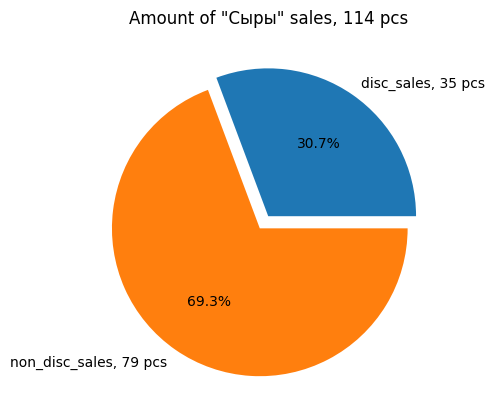

In [406]:
plt.pie(
    [disc_sales, non_disc_sales],
    labels=[f"disc_sales, {disc_sales} pcs", f"non_disc_sales, {non_disc_sales} pcs"],
    explode=[0, 0.1],
    autopct="%1.1f%%",
    startangle=0,
)
plt.title(f'Amount of "Сыры" sales, {all_sales} pcs')

5

Посчитать маржу по категориям
Нужно посчитать маржу:

В рублях
В %
Сделать это нужно по всем категориям level1 и отобразить с помощью 2 горизонтальных барчартов. Все подписи должны быть читаемыми и понятными.

In [70]:
orders2 = orders[["product_id", "quantity", "price", "cost_price"]]
categs_margin = (
    orders2.merge(products[["product_id", "level1"]])
    .groupby("level1")
    .apply(
        lambda x: pd.Series(
            {
                "margin_rub": (x["quantity"] * (x["price"] - x["cost_price"])).sum(),
                "margin_perc": round((x["quantity"] * (x["price"] - x["cost_price"])).sum()
                / (x["quantity"] * x["price"]).sum()
                * 100.0, 1),
            }
        )
    )
    .reset_index()
)
categs_margin.head(5)

,level1,margin_rub,margin_perc
0,Бакалея,8177.0,37.6
1,Безалкогольные напитки,20373.0,44.2
2,Бытовая химия,1441.0,26.3
3,Гигиена,2971.0,29.5
4,Детское питание,1817.0,35.7


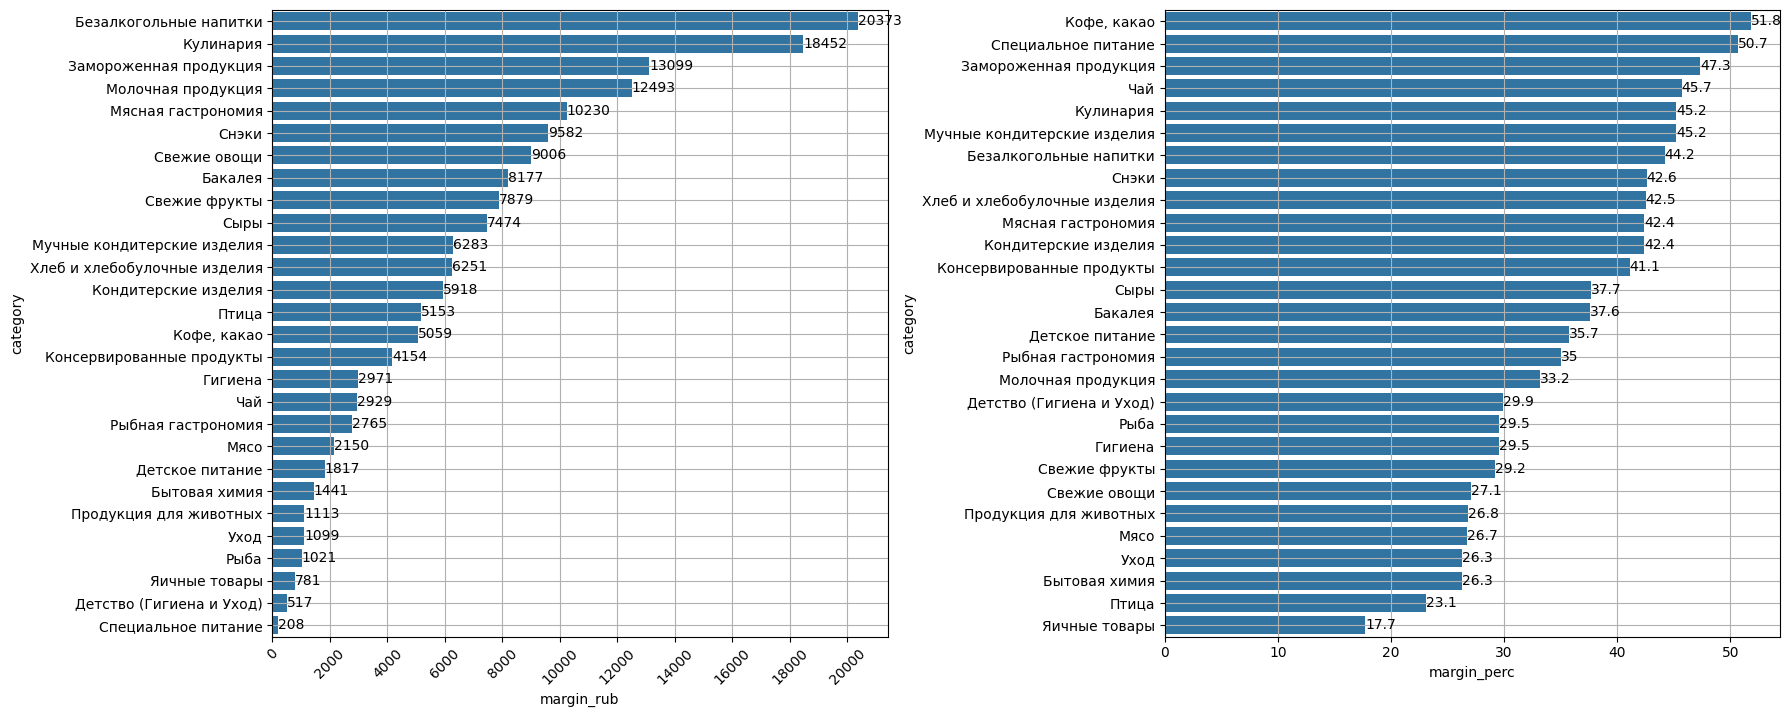

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))
sns.barplot(
    data=categs_margin.sort_values("margin_rub", ascending=False),
    x="margin_rub",
    y="level1",
    ax=ax[0],
)
sns.barplot(
    data=categs_margin.sort_values("margin_perc", ascending=False),
    x="margin_perc",
    y="level1",
    ax=ax[1],
)
fig.tight_layout()
[ax[i].set_ylabel("category") for i in range(2)]
[ax[i].grid() for i in range(2)]
ax[0].set_xticks(range(0, 21000, 2000))
ax[0].set_xticklabels(range(0, 21000, 2000), rotation=45)

# Add labels to the bars
for i in range(2):
    for bars in ax[i].containers:
        ax[i].bar_label(bars, label_type="edge", padding=0, color="black")

6

ABC анализ
Сделайте ABC-анализ продаж по количеству
Сделайте ABC-анализ по сумме продаж
Сделайте новый столбец, в котором будет итоговая группа на основании двух анализов. Например: A C.

Мое примечание: Расширить задание: сделать ABC по количеству, сумме продаж (выручке) и марже. Сделать возможность выбрать объект анализа, например: категория продукта, подкатегория или конечный продукт, чтобы можно было увидеть результат не только по отдельному продукту, но и по категориям

In [411]:
merged = orders[['product_id', 'quantity', 'price', 'cost_price']].merge(products)
merged.head(3)

,product_id,quantity,price,cost_price,level1,level2,name
0,17122,1,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
1,17122,1,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
2,17122,1,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан


In [412]:
def prepare_df_for_abc_analysis(
    df, abc_object: str, quant_col: str, retail_price_col: str, purch_price_col: str
):
    """
    the func mainly for groupby and takes arguments:
    1) df - original dataframe
    2) abc_object - abc object, column for groupby
    3) quant_col - quantity column name
    4) retail_price_col - retail price column name
    5) purch_price_col - purchase price column name
    """
    return (
        df.groupby(abc_object, dropna=False)
        .apply(
            lambda x: pd.Series(
                {
                    "quantity": x[quant_col].sum(),
                    "revenue": sum(x[quant_col] * x[retail_price_col]),
                    "margin": sum(
                        x[quant_col] * (x[retail_price_col] - x[purch_price_col])
                    ),
                }
            )
        )
        .reset_index()
        .rename(columns={abc_object: "abc_object"})
    )


# select an object to analyze here, argument 1 "abc_object"
df_prep_for_abc_example = prepare_df_for_abc_analysis(
    merged, "name", "quantity", "price", "cost_price"
)
df_prep_for_abc_example.head(3)

,abc_object,quantity,revenue,margin
0,Авокадо Хасс Artfruit,20,3556,1124
1,Азу из говядины Мясо есть!,2,818,238
2,Ананас Вкусные Истории,2,620,142


In [413]:
def calc_abc_analysis(df):
    dfc = df.copy()
    # print(df.head(2))

    columns = dfc.drop(columns=["abc_object"]).columns
    # print(columns)
    for col in columns:
        dfc = dfc.sort_values(col, ascending=False)
        cumsum_series = (
            round(dfc[col] / dfc[col].sum() * 100.0, 2)
            .sort_values(ascending=False)
            .cumsum()
        )

        # dfc[f"cumsum_%share_{col}"] = cumsum_series

        dfc[f"ABC_{col}"] = np.where(
            cumsum_series <= 80,
            "A",
            np.where(cumsum_series <= 95, "B", "C"),
        )

    dfc["ABC_full"] = dfc.iloc[:, -3] + " " + dfc.iloc[:, -2] + " " + dfc.iloc[:, -1]

    return dfc

ABC анализ по каждому наименованию товара:

In [414]:
df_prep_abc_name = prepare_df_for_abc_analysis(merged, "name", "quantity", "price", "cost_price")
calc_abc_analysis(df_prep_abc_name)

,abc_object,quantity,revenue,margin,ABC_quantity,ABC_revenue,ABC_margin,ABC_full
849,Чипсы Lay's,73,8523,3331,A,A,A,A A A
417,Напиток Coca-Cola,65,6125,2653,A,A,A,A A A
783,Филе грудки ЦБ Петелинка,33,9807,2475,A,A,A,A A A
288,Кофе в зернах Egoiste,2,3594,1978,B,A,A,B A A
357,Мандарины,24,5046,1752,A,A,A,A A A
...,...,...,...,...,...,...,...,...
359,Маска для лица Dr. Smart by Angel Key,1,72,-1,C,C,C,C C C
405,Мука С.Пудовъ,1,48,-4,C,C,C,C C C
581,Салат Айсберг,4,460,-132,A,A,C,A A C
859,Шейка свиная Черкизово,2,484,-160,B,A,C,B A C


ABC анализ по каждой подкатегории товара:

In [415]:
df_prep_abc_subcat = prepare_df_for_abc_analysis(merged, "level2", "quantity", "price", "cost_price")
calc_abc_analysis(df_prep_abc_subcat)

,abc_object,quantity,revenue,margin,ABC_quantity,ABC_revenue,ABC_margin,ABC_full
10,Готовые блюда,248,40356,18256,A,A,A,A A A
51,Напитки,252,24123,10524,A,A,A,A A A
72,Снэки соленые,180,17293,7391,A,A,A,A A A
18,Замороженные полуфабрикаты,73,15374,7204,A,A,A,A A A
92,Хлеб и хлебобулочные изделия,218,14724,6251,A,A,A,A A A
...,...,...,...,...,...,...,...,...
91,Уход за одеждой и обувью,3,235,95,C,C,C,C C C
77,Средства для сантехники,1,239,61,C,C,C,C C C
57,Первая помощь,2,168,46,C,C,C,C C C
47,Мытье посуды,2,306,43,C,C,C,C C C


ABC анализ по каждой категории товара:

In [416]:
df_prep_abc_cat = prepare_df_for_abc_analysis(merged, "level1", "quantity", "price", "cost_price")
calc_abc_analysis(df_prep_abc_cat)

,abc_object,quantity,revenue,margin,ABC_quantity,ABC_revenue,ABC_margin,ABC_full
1,Безалкогольные напитки,534,46107,20373,A,A,A,A A A
10,Кулинария,250,40840,18452,A,A,A,A A A
6,Замороженная продукция,175,27714,13099,A,A,A,A A A
11,Молочная продукция,483,37582,12493,A,A,A,A A A
13,Мясная гастрономия,112,24150,10230,B,A,A,B A A
21,Снэки,212,22477,9582,A,A,A,A A A
19,Свежие овощи,262,33222,9006,A,A,A,A A A
0,Бакалея,239,21766,8177,A,A,A,A A A
20,Свежие фрукты,184,27009,7879,A,A,A,A A A
23,Сыры,114,19824,7474,A,A,A,A A A
